<a href="https://colab.research.google.com/github/Vicksdev2/olist-ecommerce-analysis/blob/main/proyect_olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Brazilian E-Commerce Analysis</h1>


<p align="right">By - <a href="https://github.com/Vicksdev2">Victoria A.</a></p>


----
# INTRODUCTION
Olist is a leading Brazilian e-commerce platform that connects small businesses with the country's major markets, facilitating the sale of products from thousands of sellers to millions of customers.

The main question that this project's analysis revolves around is:
“How can we optimize the customer experience to maximize retention and lifetime value?”

This project performs exploratory data analysis (EDA) and data visualization using Python. The goal is to audit business performance by quantifying sales seasonality patterns, logistics efficiency, and customer behavior.

Develop an advanced analytical process that goes beyond basic metrics. This includes merging relational data sets to map the entire customer journey, applying natural language processing to textual reviews to distinguish between complaints about product quality and complaints about shipping, and using regression analysis to forecast sales trends.

### Importing Datasets

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

orders = pd.read_csv('/content/drive/MyDrive/proyecto_olist_data/olist_orders_dataset.csv')
items = pd.read_csv('/content/drive/MyDrive/proyecto_olist_data/olist_order_items_dataset.csv')
products = pd.read_csv('/content/drive/MyDrive/proyecto_olist_data/olist_products_dataset.csv')
customers = pd.read_csv('/content/drive/MyDrive/proyecto_olist_data/olist_customers_dataset.csv')
reviews = pd.read_csv('/content/drive/MyDrive/proyecto_olist_data/olist_order_reviews_dataset.csv')
print("Succesfully load")

print("Initial Dimentions:")
print(f"Orders: {orders.shape}")
print(f"Items: {items.shape}")
print(f"Customers: {customers.shape}")
print(f"Reviews: {reviews.shape}")

Succesfully load
Initial Dimentions:
Orders: (99441, 8)
Items: (112650, 7)
Customers: (99441, 5)
Reviews: (99224, 7)


In [4]:
from ast import increment_lineno
from google.colab import files
import numpy as np
import seaborn as sns
import datetime as dt


import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)


In [5]:
import ipywidgets as widgets
from IPython.display import display

def show_dataset(b):
    out.clear_output()
    with out:
        if b.description == 'Orders':
            display(orders.head())
        elif b.description == 'Items':
            display(items.head())
        elif b.description == 'Customers':
            display(customers.head())
        elif b.description == 'Products':
            display(products.head())
        elif b.description == 'Reviews':
            display(reviews.head())

btn_orders = widgets.Button(description='Orders')
btn_items = widgets.Button(description='Items')
btn_customers = widgets.Button(description='Customers')
btn_products = widgets.Button(description='Products')
btn_reviews = widgets.Button(description='Reviews')

btn_orders.on_click(show_dataset)
btn_items.on_click(show_dataset)
btn_customers.on_click(show_dataset)
btn_products.on_click(show_dataset)
btn_reviews.on_click(show_dataset)

out = widgets.Output()

display(widgets.HBox([btn_orders, btn_items, btn_customers, btn_products, btn_reviews]))
display(out)

Output()

### Merges

In [6]:
# FIRST MERGE: ORDERS, ITEMS
data = orders.merge(items, on='order_id', how='left')
print(f"Number of rows after the merge: {data.shape[0]}")


Number of rows after the merge: 113425


In [7]:
#SECOND MERGE: PRODUCT
data = data.merge(products, on='product_id', how='left')

In [8]:
#THIRD MERGE: Customers
data = data.merge(customers, on='customer_id', how='left')

In [9]:
data = data.merge(reviews, on='order_id', how='left')

# Table visualization after the merge
print(f"Final dimentions df_complet: {data.shape}")
data.head()

Final dimentions df_complet: (114092, 32)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


In [10]:
#Convert object to datetime
cols_fecha = ['order_purchase_timestamp', 'order_approved_at',
              'order_delivered_carrier_date', 'order_delivered_customer_date',
              'order_estimated_delivery_date']

# Convert to datetime
for col in cols_fecha:
    data[col] = pd.to_datetime(data[col])


data['year_month'] = data['order_purchase_timestamp'].dt.to_period('M')
data['year'] = data['order_purchase_timestamp'].dt.year
data['month'] = data['order_purchase_timestamp'].dt.month

#### ANALYSIS

### Verifiying if there is any missing data


In [11]:
def data_quality_check(df):

    # 1.  Duplicates
    print(f"Total Duplicated Rows: {df.duplicated().sum()}")
    print("-" * 30)

    # 2. Create the Missing Values Table
    null_table = pd.DataFrame({
        'Missing Values': df.isnull().sum(),
        '% Missing': (df.isnull().mean() * 100).round(2),
        'Dtype': df.dtypes
    })

    # 3. Sort to show columns with missing values first
    null_table = null_table.sort_values(by='% Missing', ascending=False)


    return null_table

quality_report = data_quality_check(data)
display(quality_report)

Total Duplicated Rows: 0
------------------------------


,Missing Values,% Missing,Dtype
review_comment_title,100569,88.15,object
review_comment_message,65926,57.78,object
order_delivered_customer_date,3253,2.85,datetime64[ns]
product_name_lenght,2390,2.09,float64
product_category_name,2390,2.09,object
product_photos_qty,2390,2.09,float64
product_description_lenght,2390,2.09,float64
order_delivered_carrier_date,1980,1.74,datetime64[ns]
review_score,961,0.84,float64
review_answer_timestamp,961,0.84,object


### Delivery
How long is the delivery time? Are the estimated times met?

In [12]:


#Delivery days
data['Delivery_days'] = (data['order_delivered_customer_date'] - data['order_purchase_timestamp']).dt.days

# Calculate the difference between the estimate and the actual amount
data['Delay_vs_estimated'] =  (data['order_delivered_customer_date'] - data['order_estimated_delivery_date']).dt.days


#To display 1 if Its late, 0 if not.
data['is_late'] = data['Delay_vs_estimated'].apply(lambda x:1 if x > 0 else 0)
data.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,year_month,year,month,Delivery_days,Delay_vs_estimated,is_late
114087,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,2018-02,2018,2,22.0,-2.0,0
114088,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,...,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,2017-08,2017,8,24.0,-6.0,0
114089,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,2018-01,2018,1,17.0,-21.0,0
114090,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,2018-01,2018,1,17.0,-21.0,0
114091,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03,1.0,006619bbed68b000c8ba3f8725d5409e,...,NaN,NaN,2018-03-17 00:00:00,2018-03-17 16:33:31,2018-03,2018,3,7.0,-18.0,0


In [13]:
data = data[data['order_status'] == 'delivered']
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,year_month,year,month,Delivery_days,Delay_vs_estimated,is_late
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2017-10,2017,10,8.0,-8.0,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,2018-07,2018,7,13.0,-6.0,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,2018-08,2018,8,9.0,-18.0,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,2017-11,2017,11,13.0,-13.0,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,2018-02,2018,2,2.0,-10.0,0


We can see that they meet the estimated delivery time. They also try to deliver days ahead of schedule.

### Customer Analysis

💰 Who are the customers who have purchased the most in terms of the amount spent?


In [14]:
customer_data = data.groupby('customer_unique_id')['order_id'].nunique().sort_values(ascending=False)
customer_data.head(5)

,order_id
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,15
3e43e6105506432c953e165fb2acf44c,9
6469f99c1f9dfae7733b25662e7f1782,7
ca77025e7201e3b30c44b472ff346268,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7


                 customer_unique_id  Purchase_frequency  Total_sum
0  0000366f3b9a7992bf8c76cfdf3221e2                   1     129.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f                   1      18.90
2  0000f46a3911fa3c0805444483337064                   1      69.00
3  0000f6ccb0745a6a4b88665a16c9f078                   1      25.99
4  0004aac84e0df4da2b147fca70cf8255                   1     180.00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

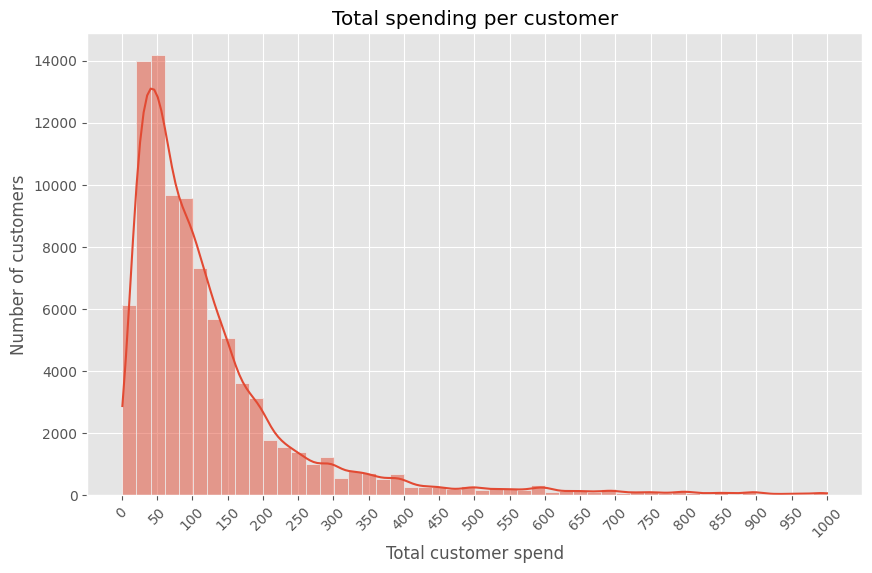

In [15]:

customer_data = data.groupby('customer_unique_id').agg({
    'order_id': 'nunique',
    'price': 'sum'
}).reset_index()

customer_data.columns = ['customer_unique_id', 'Purchase_frequency', 'Total_sum']
print(customer_data.head())

subset_data = customer_data[customer_data['Total_sum'] < 1000]

plt.figure(figsize=(10, 6))
sns.histplot(subset_data['Total_sum'], bins=50, kde=True)
plt.xticks(range(0, 1001, 50), rotation=45)
plt.title('Total spending per customer')
plt.xlabel('Total customer spend')
plt.ylabel('Number of customers')
plt.savefig('spendig_per_customer.png', dpi=300, bbox_inches='tight')
files.download('spendig_per_customer.png')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

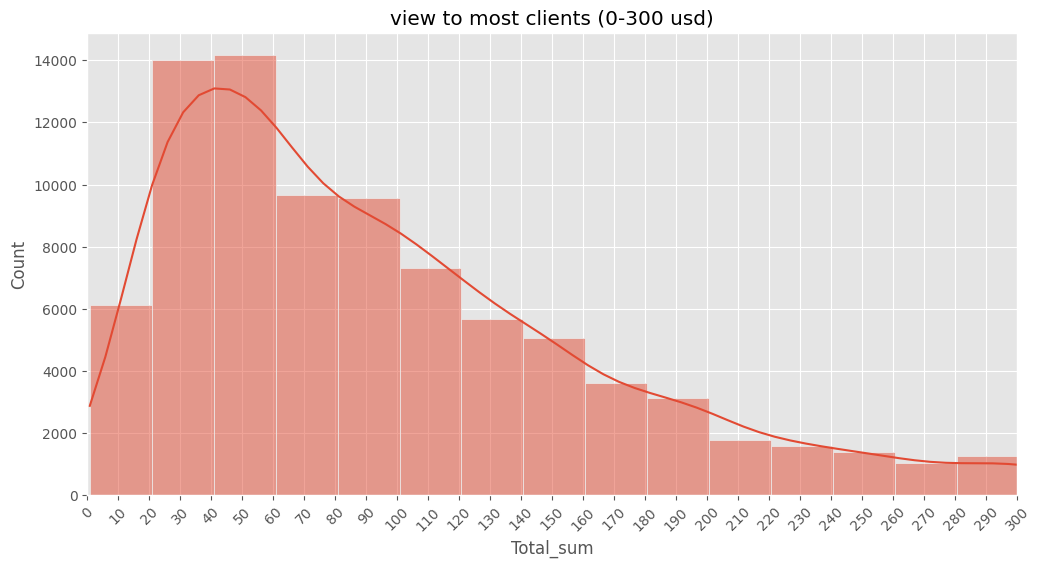

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(subset_data['Total_sum'], bins=50, kde=True)
plt.xlim(0, 300)
plt.xticks(range(0, 301, 10), rotation=45)
plt.savefig('sales_projection.png', dpi=300, bbox_inches='tight')
files.download('sales_projection.png')

plt.title('view to most clients (0-300 usd)')
plt.show()



 📊  What are the most commonly used payment methods?

In [17]:
payments = pd.read_csv('/content/drive/MyDrive/proyecto_olist_data/olist_order_payments_dataset.csv')
print(f"Load Succesfully: {payments.shape}")


Load Succesfully: (103886, 5)


Payment methods:
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

Payment methods percentage
payment_type
credit_card    73.922376
boleto         19.043952
voucher         5.558978
debit_card      1.471806
not_defined     0.002888
Name: proportion, dtype: float64


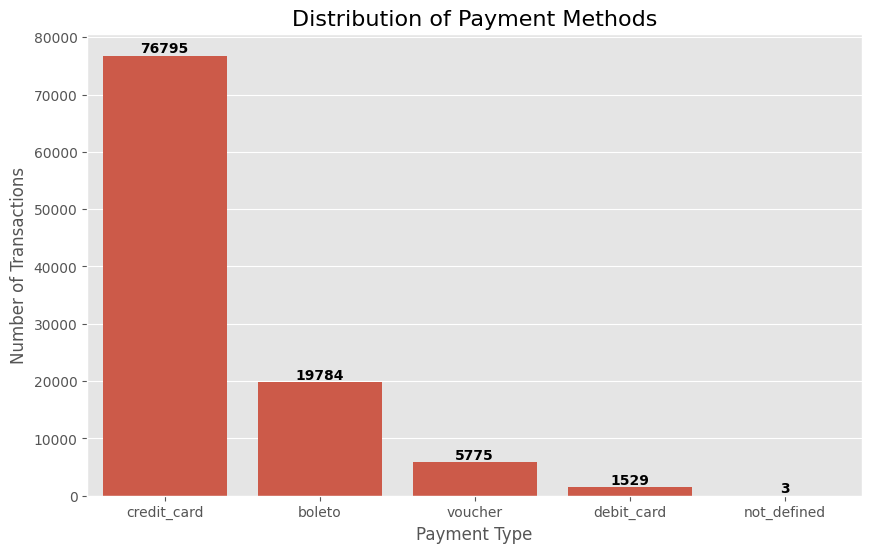

In [18]:
payments_data = payments['payment_type'].value_counts()
percentage_pay = payments['payment_type'].value_counts(normalize=True) * 100

print("Payment methods:")
print(payments_data)
print("\nPayment methods percentage")
print(percentage_pay)


plt.figure(figsize=(10, 6))
sns.barplot(x=payments_data.index, y=payments_data.values)

plt.title('Distribution of Payment Methods', fontsize=16)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)

for i, v in enumerate(payments_data.values):
    plt.text(i, v + 500, str(v), ha='center', fontweight='bold')

plt.show()



🛒 How often do customers buy?


In [19]:
# How many customers buy just once?

one_purchase = customer_data[customer_data['Purchase_frequency'] == 1].shape[0]
total_customers = customer_data.shape[0]
avg_purchase = (one_purchase / total_customers) * 100

print(f'The percentage of a single purchase is {avg_purchase}%')

The percentage of a single purchase is 96.99972150217442%


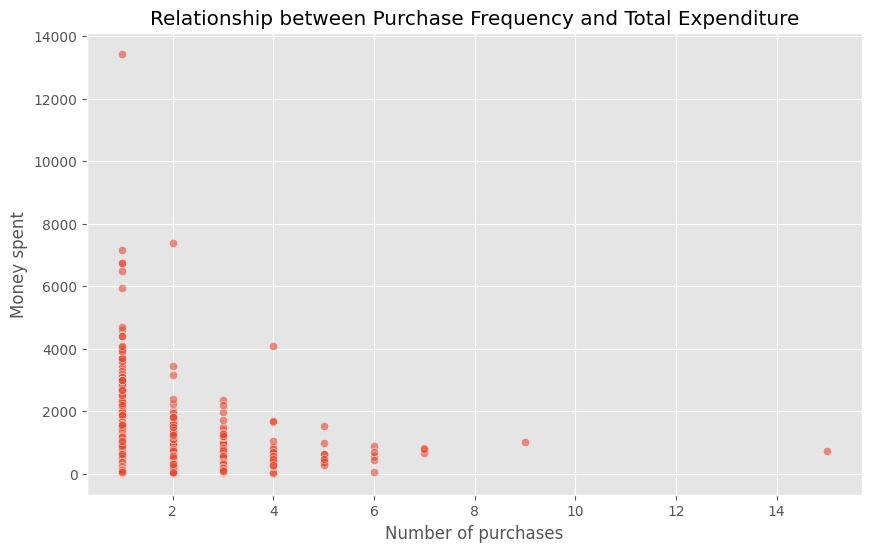

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Purchase_frequency', y='Total_sum', alpha=0.6)

plt.title('Relationship between Purchase Frequency and Total Expenditure')
plt.xlabel('Number of purchases')
plt.ylabel('Money spent')
plt.show()

### Let's join the customer_data tables with data
Now let's join both tables to classify customers.


In [22]:
data = data.merge(customer_data, on='customer_unique_id', how='left')
data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_creation_date,review_answer_timestamp,year_month,year,month,Delivery_days,Delay_vs_estimated,is_late,Purchase_frequency,Total_sum
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,2017-10-11 00:00:00,2017-10-12 03:43:48,2017-10,2017,10,8.0,-8.0,0,2,65.38
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,2018-08-08 00:00:00,2018-08-08 18:37:50,2018-07,2018,7,13.0,-6.0,0,1,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,2018-08-18 00:00:00,2018-08-22 19:07:58,2018-08,2018,8,9.0,-18.0,0,1,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,2017-12-03 00:00:00,2017-12-05 19:21:58,2017-11,2017,11,13.0,-13.0,0,1,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,2018-02-17 00:00:00,2018-02-18 13:02:51,2018-02,2018,2,2.0,-10.0,0,1,19.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110835,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,2018-03-01 00:00:00,2018-03-02 17:50:01,2018-02,2018,2,22.0,-2.0,0,1,174.90
110836,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,...,2017-09-22 00:00:00,2017-09-22 23:10:57,2017-08,2017,8,24.0,-6.0,0,1,205.99
110837,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,2018-01-26 00:00:00,2018-01-27 09:16:56,2018-01,2018,1,17.0,-21.0,0,1,359.98
110838,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,2018-01-26 00:00:00,2018-01-27 09:16:56,2018-01,2018,1,17.0,-21.0,0,1,359.98


We classify customers as follows:

*   'NEW' - only one purchase.
*   'REPETITIVE' - more than one purchase


In [23]:
data['Type_of_customer'] = np.where(data['Purchase_frequency'] > 1, 'Repetitive', 'NEW')
data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_answer_timestamp,year_month,year,month,Delivery_days,Delay_vs_estimated,is_late,Purchase_frequency,Total_sum,Type_of_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,2017-10-12 03:43:48,2017-10,2017,10,8.0,-8.0,0,2,65.38,Repetitive
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,2018-08-08 18:37:50,2018-07,2018,7,13.0,-6.0,0,1,118.70,NEW
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,2018-08-22 19:07:58,2018-08,2018,8,9.0,-18.0,0,1,159.90,NEW
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,2017-12-05 19:21:58,2017-11,2017,11,13.0,-13.0,0,1,45.00,NEW
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,2018-02-18 13:02:51,2018-02,2018,2,2.0,-10.0,0,1,19.90,NEW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110835,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,2018-03-02 17:50:01,2018-02,2018,2,22.0,-2.0,0,1,174.90,NEW
110836,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,...,2017-09-22 23:10:57,2017-08,2017,8,24.0,-6.0,0,1,205.99,NEW
110837,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,2018-01-27 09:16:56,2018-01,2018,1,17.0,-21.0,0,1,359.98,NEW
110838,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,2018-01-27 09:16:56,2018-01,2018,1,17.0,-21.0,0,1,359.98,NEW


### Locations

🚨 Where are the customers located?

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

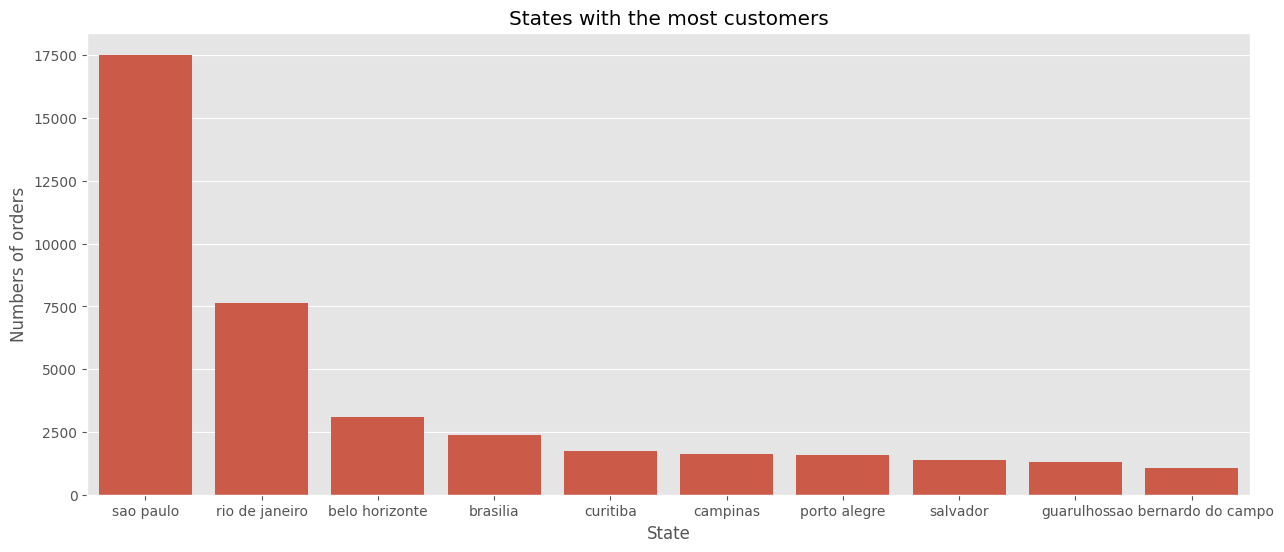

In [24]:
customer_location = data['customer_city'].value_counts().head(10)

plt.figure(figsize=(15,6))
sns.barplot(x=customer_location.index, y=customer_location.values)
plt.title('States with the most customers')
plt.xlabel('State')
plt.ylabel('Numbers of orders')
plt.savefig('states_customers.png', dpi=300, bbox_inches='tight')
files.download('states_customers.png')
plt.show()

In [46]:
data['customer_city'].value_counts().head(10)

,count
customer_city,
sao paulo,17524
rio de janeiro,7636
belo horizonte,3113
brasilia,2367
curitiba,1734
campinas,1633
porto alegre,1584
salvador,1368
guarulhos,1297


Where repetitive customers are located?

In [25]:
#ONLY REPETITIVE CUSTOMERS
data_leads_repetitive = data[data['Type_of_customer']=='Repetitive']
top_cities = data_leads_repetitive['customer_city'].value_counts().head(10)
print(top_cities)

customer_city
sao paulo         1373
rio de janeiro     591
belo horizonte     239
brasilia           161
porto alegre       145
curitiba           124
campinas           113
niteroi            110
guarulhos           93
salvador            92
Name: count, dtype: int64


Where new customers are located?

In [26]:
#ONLY NEW CUSTOMERS
data_leads_repetitive = data[data['Type_of_customer']=='NEW']
top_cities = data_leads_repetitive['customer_city'].value_counts().head(10)
print(top_cities)

customer_city
sao paulo                16151
rio de janeiro            7045
belo horizonte            2874
brasilia                  2206
curitiba                  1610
campinas                  1520
porto alegre              1439
salvador                  1276
guarulhos                 1204
sao bernardo do campo      971
Name: count, dtype: int64


 What type of product does each type of customer buy?



In [27]:
#TOP 5 BEST SELLERS (repetitive)

date_NEW = data[data['Type_of_customer']=='Repetitive']
data_filter = date_NEW['product_category_name'].value_counts().head(5)
print('Top 5 best sellers')
print('-'*30)
print(data_filter)


Top 5 best sellers
------------------------------
product_category_name
cama_mesa_banho           1199
moveis_decoracao           873
esporte_lazer              691
informatica_acessorios     588
beleza_saude               576
Name: count, dtype: int64


In [28]:
#TOP 5 BEST SELLERS (new)

date_NEW = data[data['Type_of_customer']=='NEW']
data_filter = date_NEW['product_category_name'].value_counts().head(5)
print('Top 5 best sellers')
print('-'*30)
print(data_filter)

Top 5 best sellers
------------------------------
product_category_name
cama_mesa_banho           9908
beleza_saude              8943
esporte_lazer             7798
moveis_decoracao          7366
informatica_acessorios    7120
Name: count, dtype: int64


🥈 Analyzing the rankings

In [29]:
metrics = ['review_score', 'Delivery_days', 'freight_value']
avg = data.groupby('Type_of_customer')[metrics].mean()
avg

,review_score,Delivery_days,freight_value
Type_of_customer,,,
NEW,4.077527,12.029453,20.024243
Repetitive,4.131726,11.780444,18.778353


TOP 10 categories with the best ratings

In [42]:
reviews_data = data.groupby('product_category_name').agg({
                                    'review_score' :'mean',
                                         'order_id': 'count'}).reset_index()

categories = reviews_data[reviews_data['order_id']>50]


In [43]:
print(categories.sort_values(by='review_score', ascending=False).head(10))

                 product_category_name  review_score  order_id
48              livros_interesse_geral      4.512195       537
47                   livros_importados      4.508772        57
22  construcao_ferramentas_ferramentas      4.444444       103
64         portateis_casa_forno_e_cafe      4.438356        73
49                     livros_tecnicos      4.393939       265
2                    alimentos_bebidas      4.369004       271
50                    malas_acessorios      4.352283      1077
18                           cine_foto      4.295775        71
34                    fashion_calcados      4.285156       260
1                            alimentos      4.262834       499


TOP 10 categories with the worst ratings

In [44]:
print(categories.sort_values(by='review_score', ascending=True).head(10))

               product_category_name  review_score  order_id
55                 moveis_escritorio      3.517428      1678
38           fashion_roupa_masculina      3.758065       125
71                    telefonia_fixa      3.758893       256
7                              audio      3.830084       363
14                     casa_conforto      3.851163       432
13                   cama_mesa_banho      3.920983     11107
57                       moveis_sala      3.937247       499
54                  moveis_decoracao      3.950116      8239
16                   casa_construcao      3.959528       597
25  construcao_ferramentas_seguranca      3.967033       183


### Delays
🏍 We visualize the percentage of delays by state



                Delay_vs_estimated   is_late
customer_state                              
AL                       -8.740139  0.208817
MA                       -9.996273  0.178882
SE                      -10.002667  0.162667
CE                      -11.138365  0.136268
PI                      -11.519084  0.135496
BA                      -10.978666  0.119363
RJ                      -11.998242  0.116212
PA                      -14.228087  0.112158
RR                      -18.326087  0.108696
PB                      -13.051107  0.107325


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

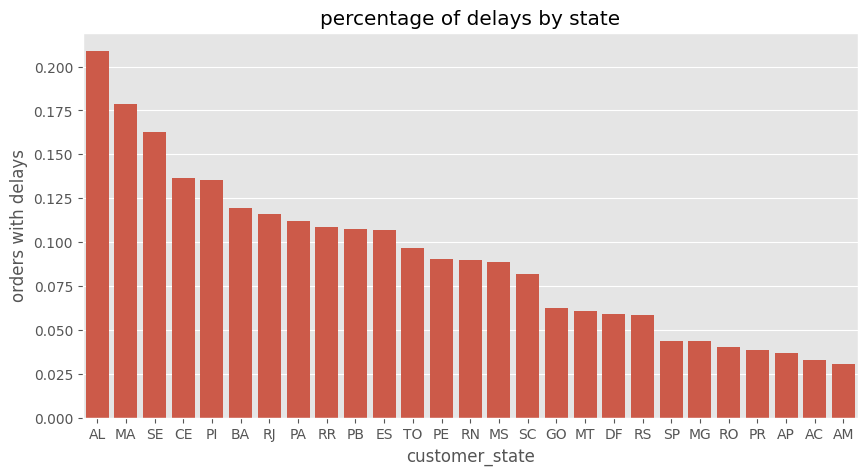

In [47]:
delay = data.groupby('customer_state').agg({
    'Delay_vs_estimated': 'mean',
    'is_late': 'mean'}).sort_values(by='is_late',ascending=False)

print(delay.head(10))
plt.figure(figsize=(10,5))
sns.barplot(x=delay.index, y=delay['is_late'])
plt.title('percentage of delays by state')
plt.ylabel('orders with delays')
plt.savefig('delays.png', dpi=300, bbox_inches='tight')
files.download('delays.png')

plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

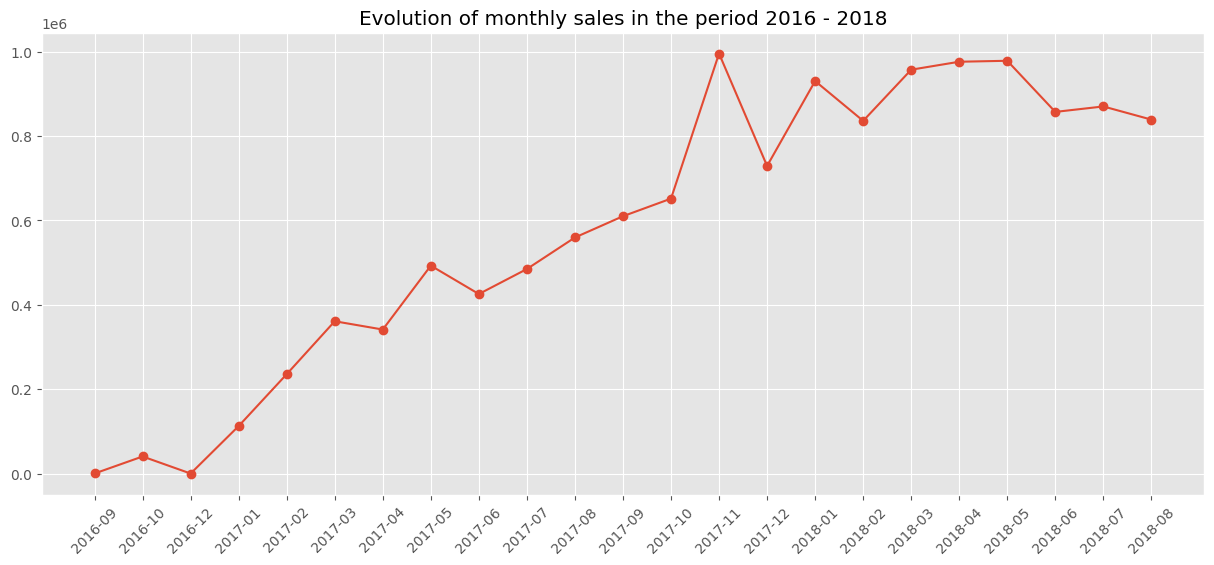

In [45]:
sells = data.groupby('year_month')['price'].sum()
sells.index = sells.index.astype(str)

plt.figure(figsize=(15,6))
plt.plot(sells.index, sells.values, marker='o', linestyle='-')
plt.title('Evolution of monthly sales in the period 2016 - 2018')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('evolutions_sales.png', dpi=300, bbox_inches='tight')
files.download('evolutions_sales.png')
plt.show()


#### Relationship between delivery time and satisfaction
###### We want to see if a longer delivery time is associated with a lower review score ⏰

/tmp/ipython-input-4158814728.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_score',y='Delivery_days', data=data, palette='coolwarm')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

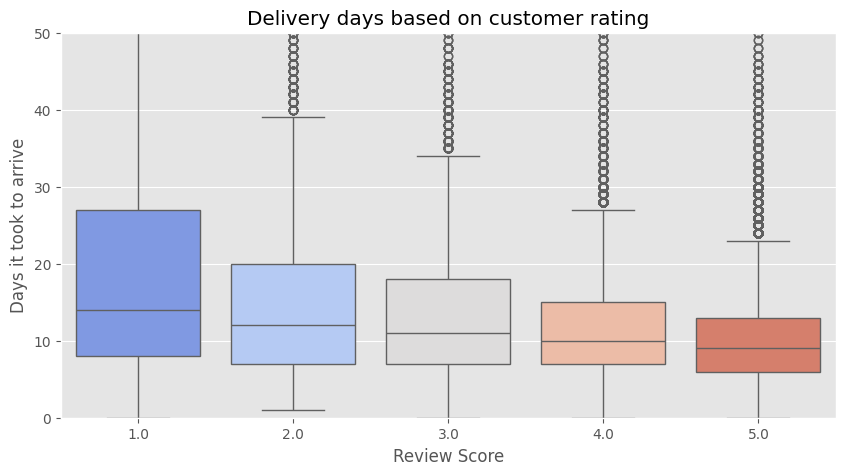

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(x='review_score',y='Delivery_days', data=data, palette='coolwarm')
plt.title('Delivery days based on customer rating')
plt.ylim(0, 50)
plt.xlabel('Review Score')
plt.ylabel('Days it took to arrive')
plt.savefig('delivery_rating.png', dpi=300, bbox_inches='tight')
files.download('delivery_rating.png')
plt.show()

#### What are the main customer complaints?
##### Search for negative reviews using keywords and check if the issue is related to logistics or the product.

In [37]:
bad_reviews = data[(data['review_score'] <= 2) & (data['review_comment_message'].notnull())]

text = " ".join(bad_reviews['review_comment_message'].astype(str).tolist())
text = text.lower()

logistica = ['entrega', 'atraso', 'prazo', 'demora', 'correios', 'não recebeu', 'não chegou']
producto = ['produto', 'qualidade', 'defeito', 'quebrado', 'errado', 'diferente', 'ruim']

count_logistica = sum([text.count(w) for w in logistica])
count_producto = sum([text.count(w) for w in producto])

print(f"Logistics-related mentions: {count_logistica}")
print(f"Product-related mentions: {count_producto}")


Logistics-related mentions: 4306
Product-related mentions: 8804


As we can see, most complaints are about the product, not the delivery logistics.

## Small prediction

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

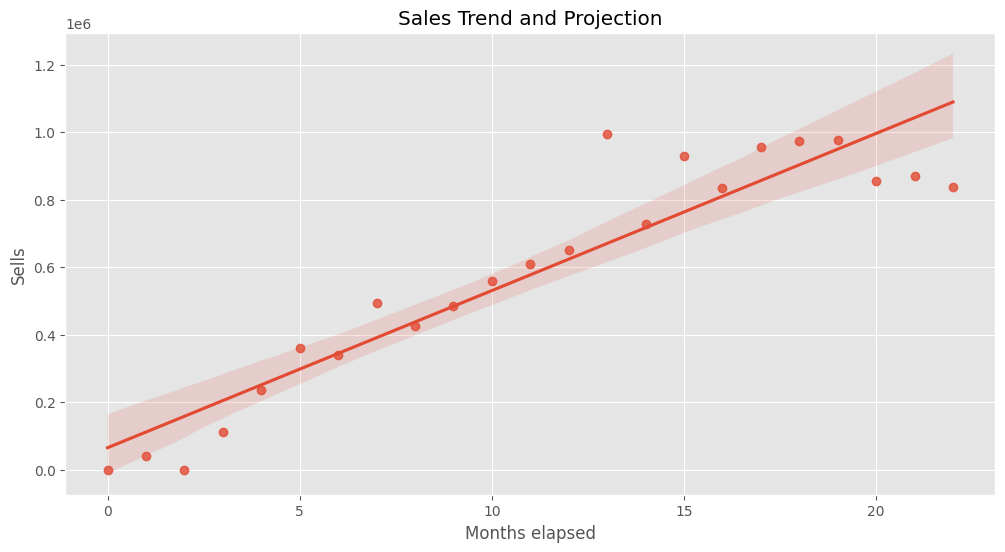

In [38]:
sells = data.groupby('year_month')['price'].sum().reset_index()
sells['time_idx'] = sells.index

plt.figure(figsize=(12,6))
sns.regplot(x='time_idx', y='price', data=sells, marker='o')
plt.title('Sales Trend and Projection')
plt.xlabel('Months elapsed')
plt.ylabel('Sells')
plt.savefig('sales_projection.png', dpi=300, bbox_inches='tight')
files.download('sales_projection.png')
plt.show()

⏰  How soon do customers return to make another purchase?

Repurchase Cycle Statistics (in days):
count    3120.000000
mean       78.780449
std       107.196623
min         0.000000
25%         0.000000
50%        29.000000
75%       121.000000
max       608.000000
Name: days between purchases, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

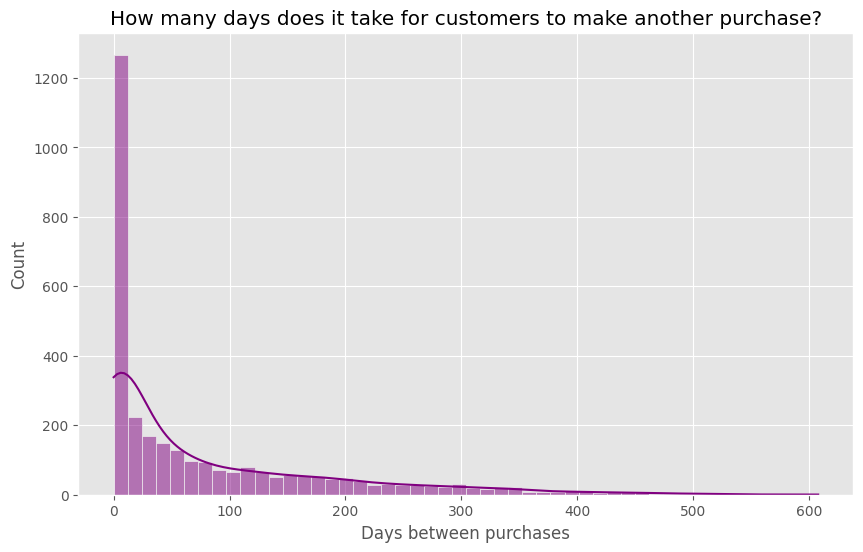

In [48]:
customer_data = data.groupby('customer_unique_id').agg({
    'order_id': 'nunique',
    'price': 'sum'
}).reset_index()
customer_data.columns = ['customer_unique_id', 'Purchase_frequency', 'Total_sum']


vip_ids = customer_data[customer_data['Purchase_frequency'] > 1]['customer_unique_id']
df_vips = data[data['customer_unique_id'].isin(vip_ids)][['customer_unique_id', 'order_id', 'order_purchase_timestamp']].drop_duplicates()
df_vips = df_vips.sort_values(by=['customer_unique_id', 'order_purchase_timestamp'])
df_vips['days between purchases'] = df_vips.groupby('customer_unique_id')['order_purchase_timestamp'].diff().dt.days


print("Repurchase Cycle Statistics (in days):")
print(df_vips['days between purchases'].describe())


plt.figure(figsize=(10,6))
sns.histplot(df_vips['days between purchases'].dropna(), bins=50, kde=True, color='purple')
plt.title('How many days does it take for customers to make another purchase?')
plt.xlabel('Days between purchases')
plt.savefig('days_purchase.png', dpi=300, bbox_inches='tight')
files.download('days_purchase.png')
plt.show()

Well, the result is interesting.
Half of repeat customers make another purchase within a month.
But we also see that there are customers who place several orders on the same day.

Data: 78.78 days.
The “mean” is far from the median (29). The average is “skewed” by those customers who took 600 days (the maximum).